In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math 

In [2]:
def fuctionchoice(i,x):
    if i==0:
        y=x**2
    if i==1:
        y=np.sin(np.pi*x)
    if i==2:
        y=np.abs(x)
    if i==3:
        y=np.heaviside(x,0)
    return y


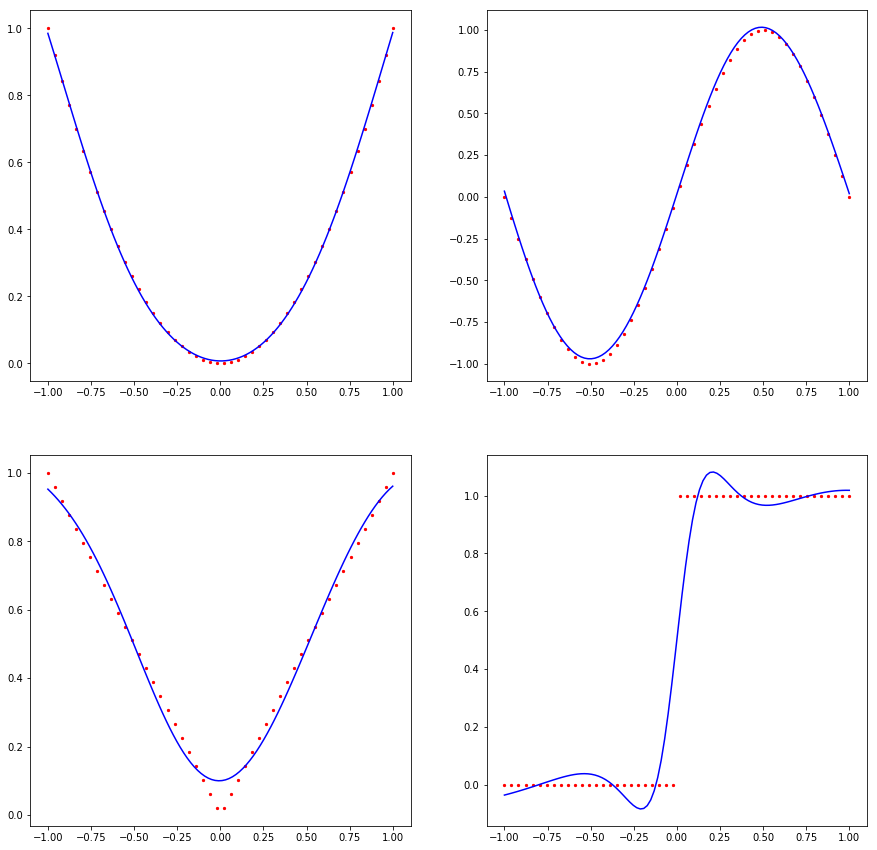

In [125]:
n_input=1
h=5
n_output=1
sample=50

w1=np.random.randn(h+1,n_input+1)
w2=np.random.randn(n_output,h+1)
x_tr=np.linspace(-1,1,sample).reshape(1,sample)
plt.figure(figsize=(15,15))
def netw(w1,w2,x_n):
    x=np.vstack([np.ones_like(x_n),x_n])      
    a=w1@x
    z=np.tanh(a)
    y=w2@z
    return z,y,x
def deriv(w1,w2,x,y):
    zj,yk,xi=netw(w1,w2,x)
    deltak=yk-y
    deltaj=w2.T@deltak
    for i in range(h+1):
        for j in range(sample):
            deltaj[i][j]=(1-zj[i][j]**2)*deltaj[i][j]
    first=xi@deltaj.T
    second=deltak@zj.T
    w1=w1-0.01*first.T
    w2=w2-0.01*second
    return w1,w2
for i in range(4):
    y_tr=fuctionchoice(i,x_tr)
    plt.subplot(2,2,i+1)
    for epoch in range(10000):
        w1,w2=deriv(w1,w2,x_tr,y_tr)
    x_te=np.linspace(-1,1,100).reshape(1,100)
    x=np.vstack([np.ones_like(x_te),x_te])     
    a=np.dot(w1,x)
    z=np.tanh(a)
    y=w2@z
    plt.scatter(x_tr,y_tr,c='r',s=5)
    plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='b')
plt.show()

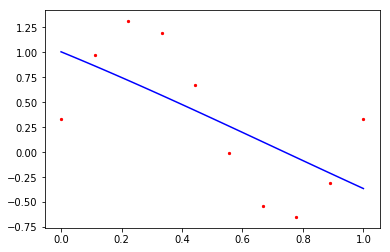

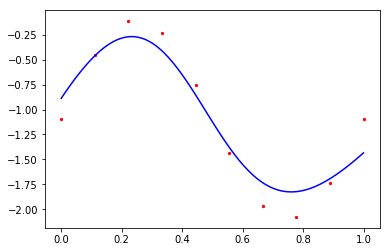

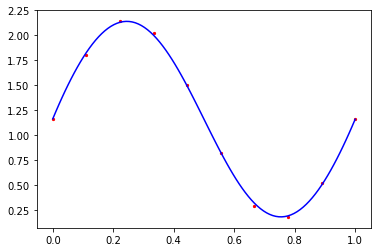

In [4]:
n_input=1
hidden=[1,10,50]
n_output=1
sample=10
def netw(w1,w2,x_n):
    x=np.vstack([np.ones_like(x_n),x_n])      
    a=w1@x
    z=np.tanh(a)
    y=w2@z
    return z,y,x
for h in hidden:
    w1=np.random.randn(h+1,n_input+1)
    w2=np.random.randn(n_output,h+1)
    x_tr=np.linspace(0,1,10).reshape(1,10)
    def deriv(w1,w2,x,y):
        zj,yk,xi=netw(w1,w2,x)
        deltak=yk-y
        one=np.zeros((h+1,h+1))
        deltaj=w2.T@deltak
        for i in range(h+1):
            for j in range(sample):
                deltaj[i][j]=(1-zj[i][j]**2)*deltaj[i][j]
        first=xi@deltaj.T    
        second=deltak@zj.T
        w1=w1-0.001*first.T
        w2=w2-0.001*second
        return w1,w2
    y_tr=np.sin(x_tr*np.pi*2)+np.random.randn(1)
    for epoch in range(10000):
        w1,w2=deriv(w1,w2,x_tr,y_tr)
    x_te=np.linspace(0,1,100).reshape(1,100)
    x=np.vstack([np.ones_like(x_te),x_te])     
    a=np.dot(w1,x)
    z=np.tanh(a)
    y=w2@z
    plt.scatter(x_tr,y_tr,c='r',s=5)
    plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='b')
# # plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='b')
    plt.show()


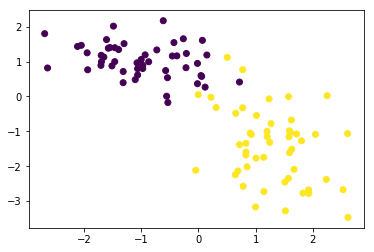

In [137]:
data,target=datasets.make_classification(n_samples=100, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=2,
                                         n_clusters_per_class=1)

plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [148]:
n_input=2
h=5
n_output=1
sample=50

w1=np.random.randn(h+1,n_input+1)
w2=np.random.randn(n_output,h+1)
x_tr=data.reshape(2,100)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def netw(w1,w2,x_n):
    x=np.vstack([np.ones((1,100)),x_n])      
    a=w1@x
    z=np.tanh(a)
    y=sigmoid(w2@z)
    return z,y,x
def deriv(w1,w2,x,y):
    zj,yk,xi=netw(w1,w2,x)
    deltak=yk-y
    deltaj=w2.T@deltak
    for i in range(h+1):
        for j in range(sample):
            deltaj[i][j]=(1-zj[i][j]**2)*deltaj[i][j]
    first=xi@deltaj.T
    second=deltak@zj.T
    w1=w1-0.01*first.T
    w2=w2-0.01*second
    return w1,w2
y_tr=target
for epoch in range(1000):
    w1,w2=deriv(w1,w2,x_tr,y_tr)



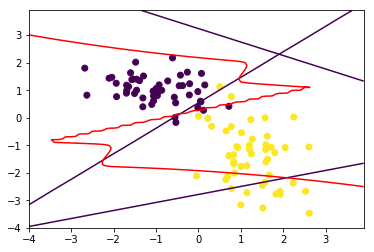

In [149]:
xx,yy = np.mgrid[-4:4:.1, -4:4:.1]
x=xx.reshape(1,6400)
y=yy.reshape(1,6400)
X=np.vstack([x,y])
X=np.vstack([np.ones((1,6400)),X])      
a=w1@X
z=np.tanh(a)
con=sigmoid(w2@z)
cons=con.reshape(80,80)
plt.scatter(data[:,0],data[:,1],c=target)

plt.contour(xx,yy,z[0].reshape(80,80),levels=0.5)
plt.contour(xx,yy,z[1].reshape(80,80),levels=0.5)
plt.contour(xx,yy,z[2].reshape(80,80),levels=0.5)

plt.contour(xx,yy,cons,colors='r',levels=0.5)

plt.show()

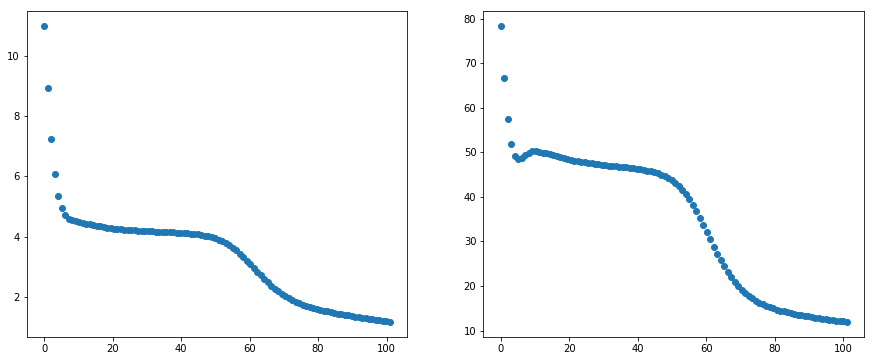

In [106]:
n_input=1
h=3
n_output=1
sample=10
w1=np.random.randn(h+1,n_input+1)
w2=np.random.randn(n_output,h+1)
x_tr=np.linspace(-1,1,sample).reshape(1,sample)
def netw(w1,w2,x_n):
    x=np.vstack([np.ones_like(x_n),x_n])      
    a=w1@x
    z=np.tanh(a)
    y=w2@z
    return z,y,x
def deriv(w1,w2,x,y):
    zj,yk,xi=netw(w1,w2,x)
    deltak=yk-y
    deltaj=w2.T@deltak
    for i in range(h+1):
        for j in range(sample):
            deltaj[i][j]=(1-zj[i][j]**2)*deltaj[i][j]
    first=xi@deltaj.T
    second=deltak@zj.T
    w1=w1-0.01*first.T
    w2=w2-0.01*second
    return w1,w2,deltak
plt.figure(figsize=(15,6))

y_tr=np.sin(x_tr*np.pi*2)+np.random.randn(1)
x_te=np.linspace(-1,1,100).reshape(1,100)
y_te=np.sin(x_te*np.pi*2)+np.random.randn(1)
err=[]
errte=[]
max_iter=100
for k in range(1,max_iter+1):
    for epoch in range(k):
        w1,w2,dk=deriv(w1,w2,x_tr,y_tr)
    x=np.vstack([np.ones_like(x_te),x_te])   
    a=np.dot(w1,x)
    z=np.tanh(a)
    yy=w2@z
    deltak_te=yy-y_te
    err.append(dk@dk.T)
    errte.append(deltak_te@deltak_te.T)


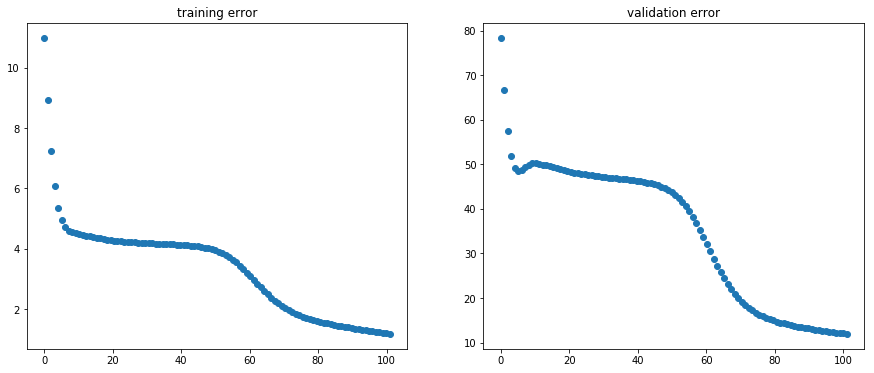

In [108]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(np.linspace(0,max_iter+1,max_iter),err)
plt.title('training error')
plt.subplot(1,2,2)
plt.scatter(np.linspace(0,max_iter+1,max_iter),errte)
plt.title('validation error')
plt.show()

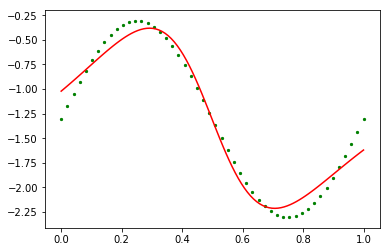

In [10]:
n_input=1
h=2
n_output=1
sample=50
def netw(w1,w2,x_n):
    x=np.vstack([np.ones_like(x_n),x_n])      
    a=w1@x
    z=np.tanh(a)
    y=w2@z
    return z,y,x
w1=np.random.randn(h+1,n_input+1)
w2=np.random.randn(n_output,h+1)
x_tr=np.linspace(0,1,sample).reshape(1,sample)
def deriv(w1,w2,x,y):
    zj,yk,xi=netw(w1,w2,x)
    deltak=yk-y
    one=np.zeros((h+1,h+1))
    deltaj=w2.T@deltak
    for i in range(h+1):
        for j in range(sample):
            deltaj[i][j]=(1-zj[i][j]**2)*deltaj[i][j]
    first=xi@deltaj.T    
    second=deltak@zj.T
    w1=w1-0.001*first.T
    w2=w2-0.001*second
    return w1,w2
y_tr=np.sin(x_tr*np.pi*2)+np.random.randn(1)
for epoch in range(10000):
    w1,w2=deriv(w1,w2,x_tr,y_tr)
x_te=np.linspace(0,1,100).reshape(1,100)
x=np.vstack([np.ones_like(x_te),x_te])     
a=np.dot(w1,x)
z=np.tanh(a)
y=w2@z
plt.scatter(x_tr,y_tr,c='g',s=5)
plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='r')
# # plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='b')
plt.show()


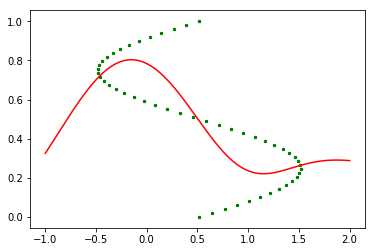

In [20]:
#exchanging the roles of x and t. Here the same network trained again by minimizing 
#the sum-of-squares error function givesa very poor fit to the data due to themultimodality of the data set
x_tr=np.linspace(0,1,sample).reshape(1,sample)
y_tr=np.sin(x_tr*np.pi*2)+np.random.randn(1)
temp=y_tr
y_tr=x_tr
x_tr=temp
plt.scatter(x_tr,y_tr,c='g',s=5)
w1=np.random.randn(h+1,n_input+1)
w2=np.random.randn(n_output,h+1)
for epoch in range(10000):
    w1,w2=deriv(w1,w2,x_tr,y_tr)
x_te=np.linspace(-1,2,1000).reshape(1,1000)
x=np.vstack([np.ones_like(x_te),x_te])     
a=np.dot(w1,x)
z=np.tanh(a)
y=w2@z
plt.scatter(x_tr,y_tr,c='g',s=5)
plt.plot(x_te.reshape(1000,1),y.reshape(1000,1),color='r')
# # plt.plot(x_te.reshape(100,1),y.reshape(100,1),color='b')
plt.show()